In [1]:
import sparse_ir
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

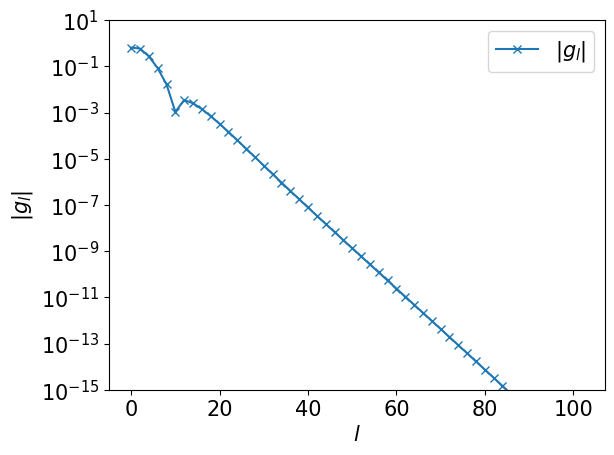

In [2]:
def rho(omega):
    if np.abs(omega) < 1:
        return (2/np.pi) * np.sqrt(1-omega**2)
    else:
        return 0.0

beta = 10000
wmax = 1
basis = sparse_ir.FiniteTempBasis("F", beta, wmax, eps=1e-15)

rhol = basis.v.overlap(rho, -wmax, wmax)
gl = - basis.s * rhol

ls = np.arange(basis.size)
plt.semilogy(ls[::2], np.abs(gl[::2]), marker="x", label=r"$|g_l|$")
plt.xlabel(r"$l$")
plt.ylabel(r"$|g_l|$")
plt.ylim([1e-15, 10])
plt.legend()
plt.show()

In [3]:
smpl_tau = sparse_ir.TauSampling(basis)
print("sampling times: ", smpl_tau.sampling_points)
print("Condition number: ", smpl_tau.cond)

sampling times: 

[-4.77367971e+03 -4.32558093e+03 -3.89066195e+03 -3.47632675e+03
 -3.08822305e+03 -2.73005010e+03 -2.40365799e+03 -2.10933930e+03
 -1.84620401e+03 -1.61255276e+03 -1.40619863e+03 -1.22471811e+03
 -1.06563154e+03 -9.26523584e+02 -8.05116904e+02 -6.99312213e+02
 -6.07205075e+02 -5.27087701e+02 -4.57441536e+02 -3.96924657e+02
 -3.44356665e+02 -2.98702768e+02 -2.59058095e+02 -2.24632846e+02
 -1.94738594e+02 -1.68775857e+02 -1.46222974e+02 -1.26626234e+02
 -1.09591176e+02 -9.47749803e+01 -8.18798420e+01 -7.06472437e+01
 -6.08530255e+01 -5.23031657e+01 -4.48301679e+01 -3.82899524e+01
 -3.25591383e+01 -2.75326206e+01 -2.31213652e+01 -1.92503770e+01
 -1.58568265e+01 -1.28883391e+01 -1.03014593e+01 -8.06029765e+00
 -6.13536426e+00 -4.50258218e+00 -3.14246915e+00 -2.03947191e+00
 -1.18143645e+00 -5.59200332e-01 -1.66317562e-01 -8.31587808e-02
  8.31587808e-02  1.66317562e-01  5.59200332e-01  1.18143645e+00
  2.03947191e+00  3.14246915e+00  4.50258218e+00  6.13536426e+00
  8.06029765e+00  1.03014

Condition number: 

56.795150177430045

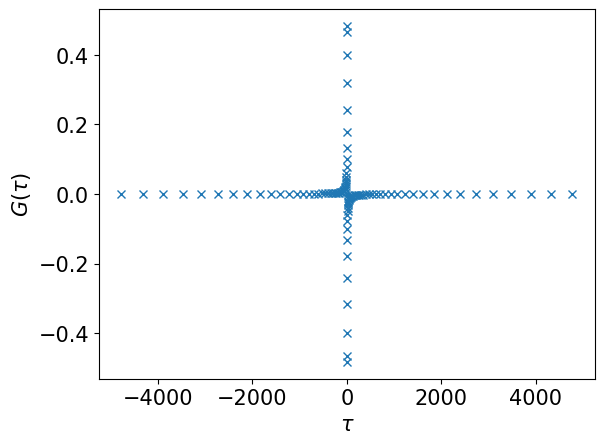

In [4]:
# Evaluate G(τ) on the sampling times
gtau_smpl = smpl_tau.evaluate(gl)
plt.plot(smpl_tau.sampling_points, gtau_smpl, marker="x", ls="")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$G(\tau)$")
plt.show()

# Fit G(τ) on the sampling times
gl_reconst_from_tau = smpl_tau.fit(gtau_smpl)

In [5]:
smpl_matsu = sparse_ir.MatsubaraSampling(basis)
print("sampling frequencies: ", smpl_matsu.sampling_points)
print("Condition number: ", smpl_matsu.cond)

sampling frequencies: 

[-34629 -14203  -8629  -6089  -4627  -3671  -2991  -2481  -2083  -1765
  -1505  -1289  -1107   -953   -823   -711   -615   -533   -461   -399
   -347   -301   -261   -225   -195   -169   -147   -127   -111    -97
    -83    -73    -63    -55    -49    -41    -37    -33    -29    -25
    -23    -21    -19    -17    -15    -13    -11     -9     -7     -5
     -3     -1      1      3      5      7      9     11     13     15
     17     19     21     23     25     29     33     37     41     49
     55     63     73     83     97    111    127    147    169    195
    225    261    301    347    399    461    533    615    711    823
    953   1107   1289   1505   1765   2083   2481   2991   3671   4627
   6089   8629  14203  34629]

Condition number: 

193.8571399851111

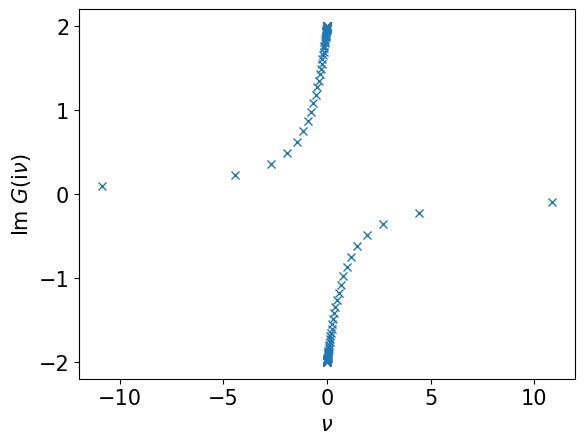

In [6]:
# Evaluate G(iv) on the sampling frequencies
giv_smpl = smpl_matsu.evaluate(gl)
plt.plot((np.pi/beta)*smpl_matsu.wn, giv_smpl.imag, marker="x", ls="")
plt.xlabel(r"$\nu$")
plt.ylabel(r"Im $G(\mathrm{i}\nu)$")
plt.show()

# Fit G(τ) on the sampling times
gl_reconst_from_matsu = smpl_matsu.fit(giv_smpl)

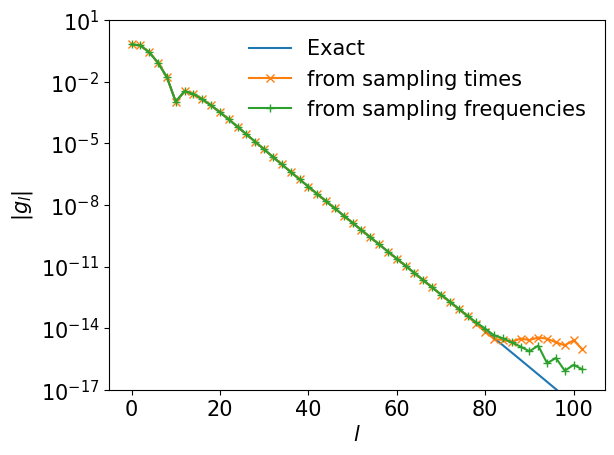

In [7]:
plt.semilogy(ls[::2], np.abs(gl[::2]), marker="", ls="-", label="Exact")
plt.semilogy(ls[::2], np.abs(gl_reconst_from_tau[::2]), marker="x", label="from sampling times")
plt.semilogy(ls[::2], np.abs(gl_reconst_from_matsu[::2]), marker="+", label="from sampling frequencies")
plt.xlabel(r"$l$")
plt.ylabel(r"$|g_l|$")
plt.ylim([1e-17, 10])
plt.legend(frameon=False)
plt.show()

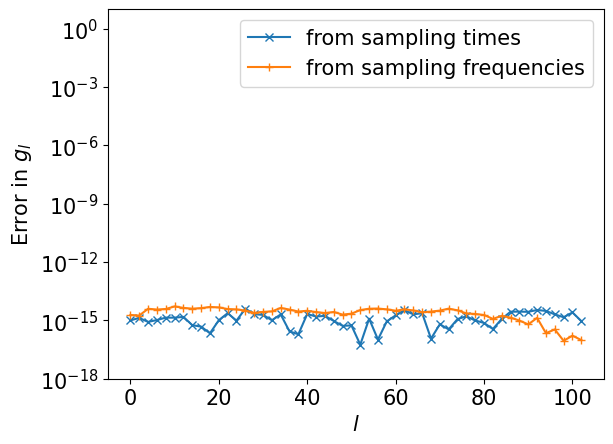

In [8]:
plt.semilogy(ls[::2], np.abs((gl_reconst_from_tau-gl)[::2]), marker="x", label="from sampling times")
plt.semilogy(ls[::2], np.abs((gl_reconst_from_matsu-gl)[::2]), marker="+", label="from sampling frequencies")
plt.xlabel(r"$l$")
plt.ylabel(r"Error in $g_l$")
plt.ylim([1e-18, 10])
plt.legend()
plt.show()